In [9]:
import numpy as np
import matplotlib.pyplot as plt

"""
Plotting
"""
import matplotlib as mpl 

mpl.rcParams['font.size'] = 14

In [ ]:

"""

"""
y = m* x + c

In [5]:
def Acceptance(): 
    
    return 


In [6]:
def lnprior(): 
    
    return 

In [7]:
def lnlike(): 
    
    return

In [8]:
def lnpost(): 
    
    return 

In [10]:
import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy as sp
import seaborn as sns

In [11]:
from matplotlib import pyplot as plt
from theano import tensor as tt

In [12]:
N = 5
K = 30

alpha = 2
P0 = sp.stats.norm
f = lambda x, theta: sp.stats.norm.pdf(x, theta, 0.3)

In [14]:
x_plot = np.linspace(-3, 3, 200)


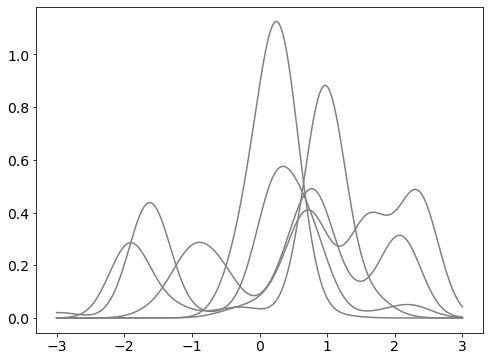

In [16]:
beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

theta = P0.rvs(size=(N, K))

dpm_pdf_components = f(x_plot[np.newaxis, np.newaxis, :], theta[..., np.newaxis])
dpm_pdfs = (w[..., np.newaxis] * dpm_pdf_components).sum(axis=1)
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x_plot, dpm_pdfs.T, c="gray"); 


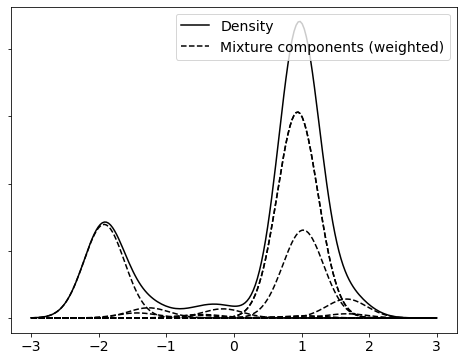

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ix = 1

ax.plot(x_plot, dpm_pdfs[ix], c="k", label="Density")
ax.plot(
    x_plot,
    (w[..., np.newaxis] * dpm_pdf_components)[ix, 0],
    "--",
    c="k",
    label="Mixture components (weighted)",
)
ax.plot(x_plot, (w[..., np.newaxis] * dpm_pdf_components)[ix].T, "--", c="k")

ax.set_yticklabels([])
ax.legend(loc=1);

In [18]:
import pandas as pd
import os

cwd = os.chdir('/Users/jackcarter/Downloads')
df = pd.read_csv('paolo_plotting.csv')

In [19]:
df.head()

,Sample,Lithology/chemistry,K2O,CaO,TiO2,SiO2,Al2O3,Na2O,MgO,FeO,MnO,SO3,P2O5,Cl,Total
0,90_2_48_50b,Granitoid (clast in UIM),3.03,2.46,0.23,71.43,12.43,4.65,0.18,2.31,0.05,0.20,0.06,NaN,99.35
1,93_2_16_17,Granitoid (clast in UIM),3.43,2.55,0.37,72.09,14.52,4.05,0.80,2.04,0.03,NaN,0.09,NaN,101.05
2,94_3_36_38,Granitoid (clast in UIM),4.87,1.72,0.28,71.75,13.76,3.76,0.97,1.83,0.02,NaN,0.07,NaN,100.78
3,95_2_20_22,Granitoid (clast in UIM),5.79,1.08,0.14,71.97,14.09,3.78,0.52,0.64,0.01,NaN,0.02,NaN,99.28
4,95_2_89.5_91.5,Granitoid (clast in UIM),3.11,0.91,0.20,75.80,11.64,4.15,0.72,1.27,0.01,0.04,0.09,NaN,99.38


In [20]:
#Importing PCA
from sklearn.decomposition import PCA
"""
Preprocessing the data
"""
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 

In [23]:
#Getting tektite geochem data:
geochem_data = pd.read_csv('/Users/jackcarter/Downloads/geochem_data.csv', header=0)
geochem_data['sample_no'] = [i[1] for i in geochem_data['Sample'].str.split('_')]
geochem_data.head()

,Sample,Point No.,Line,K2O,CaO,TiO2,SiO2,Al2O3,Na2O,MgO,FeO,MnO,Cl,SO3,P2O5,Total,sample_no
0,D1_sph1,1,3837 G,0.86,21.26,0.62,51.57,13.85,2.46,4.29,4.55,0.16,0.01,0.02,NaN,99.65,sph1
1,D1_sph1,2,3838 G,0.61,24.94,0.60,48.62,12.88,1.80,4.52,4.86,0.12,0.00,0.25,NaN,99.21,sph1
2,D1_sph1,3,3839 G,1.34,17.58,0.63,54.09,13.99,3.07,3.66,4.34,0.13,0.00,0.05,NaN,98.85,sph1
3,D1_sph1,4,3840 G,0.91,19.85,0.65,52.31,13.84,2.59,3.99,4.90,0.13,0.00,0.16,NaN,99.34,sph1
4,D1_sph1,5,3841 G,0.89,21.10,0.64,50.91,13.55,2.30,4.34,4.48,0.11,0.00,0.07,NaN,98.39,sph1


In [24]:
"""
Preprocess
Necessary for machine learning
"""
#Getting features/variables of the dataframe:
features = ['K2O', 'CaO', 'TiO2', 
            'SiO2','Al2O3', 'Na2O',
            'MgO', 'FeO', 'MnO', 
            'Cl', 'SO3']

x = geochem_data[features].values

scaler = StandardScaler()
scaler.fit(x)

scaled_data = scaler.transform(x)
scaled_data;

In [25]:
#Define PCA model to use:
pca = PCA(n_components=5)

#fit PCA model to data
pca_fit = pca.fit(scaled_data)

In [26]:
x_pca = pca.transform(scaled_data); 

In [28]:
x_pca.shape

(465, 5)

Text(0, 0.5, 'PC$_{2}$')

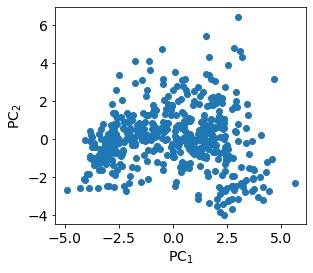

In [35]:
"""
Look at two PCs
"""
fig= plt.figure(figsize = (4.5,4))
plt.scatter(x_pca[:,0], x_pca[:,1],
            vmin =1, vmax = 2)
plt.xlabel('PC$_{1}$')
plt.ylabel('PC$_{2}$')

In [31]:
x_pca[:,0].shape[0]

465

In [36]:
x_pca[:,1].shape[0]

465

In [37]:
def PCA_liner_mix(x, k, x_data):
    
    for i in range(k): 
        Y += w[i]*x_data[i]
        
    return Y

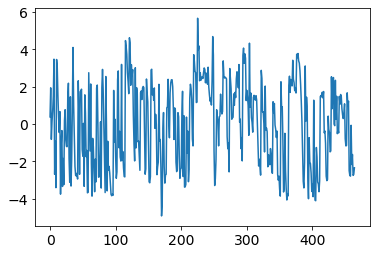

In [39]:
plt.plot(x_pca[:,0])

Text(0, 0.5, 'Frequency')

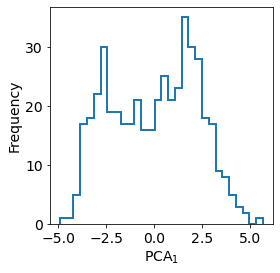

In [46]:
plt.figure(figsize = (4,4))
plt.hist(x_pca[:,0], 
        histtype = 'step', 
        lw = 2, bins = 30)
plt.xlabel('PCA$_{1}$')
plt.ylabel('Frequency')

In [54]:
K = 20
N = x_pca[:,0].shape[0]
N

465

In [55]:
def stick_breaking(beta):
    portion_remaining = tt.concatenate([[1], tt.extra_ops.cumprod(1 - beta)[:-1]])

    return beta * portion_remaining


In [56]:
with pm.Model() as model:
    alpha = pm.Gamma("alpha", 1.0, 1.0)
    beta = pm.Beta("beta", 1.0, alpha, shape=K)
    w = pm.Deterministic("w", stick_breaking(beta))

    tau = pm.Gamma("tau", 1.0, 1.0, shape=K)
    lambda_ = pm.Gamma("lambda_", 10.0, 1.0, shape=K)
    mu = pm.Normal("mu", 0, tau=lambda_ * tau, shape=K)
    obs = pm.NormalMixture(
        "obs", w, mu, tau=lambda_ * tau, observed=x_pca[:,0])

In [63]:
SEED = np.random.seed(12342145)
with model:
    trace = pm.sample(10000, tune=10000,step = pm.Metropolis(), 
                      chains=2, 
                      random_seed=SEED)

<ipython-input-63-a149464b1b63>:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(10000, tune=10000,step = pm.Metropolis(),
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [mu]
>Metropolis: [lambda_]
>Metropolis: [tau]
>Metropolis: [beta]
>Metropolis: [alpha]


Sampling 2 chains for 10_000 tune and 10_000 draw iterations (20_000 + 20_000 draws total) took 42 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


<ipython-input-64-4b673fced3da>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/jackcarter/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'w'}>],
       [<AxesSubplot:title={'center':'tau'}>,
        <AxesSubplot:title={'center':'tau'}>],
       [<AxesSubplot:title={'center':'lambda_'}>,
        <AxesSubplot:title={'center':'lambda_'}>]], dtype=object)

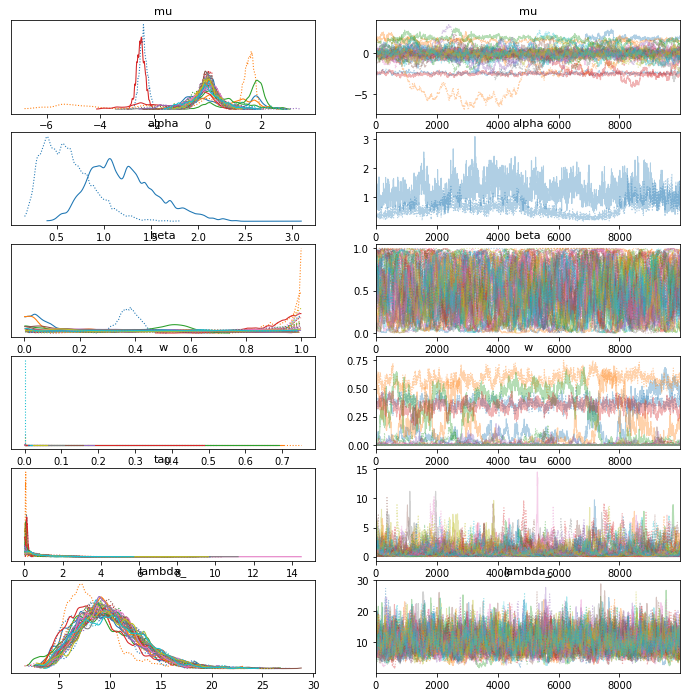

In [64]:
pm.traceplot(trace)

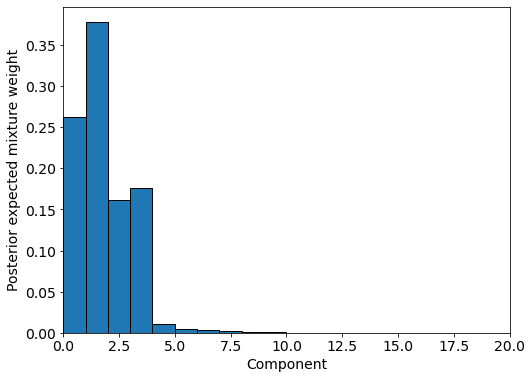

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))

plot_w = np.arange(K) + 1

ax.bar(plot_w - 0.5, trace["w"].mean(axis=0), width=1.0, lw=1, 
       edgecolor = 'k')

ax.set_xlim(0, K)
ax.set_xlabel("Component")

ax.set_ylabel("Posterior expected mixture weight");

In [77]:
post_pdf_contribs = sp.stats.norm.pdf(
    np.atleast_3d(np.linspace(-6, 6, 200)),
    trace["mu"][:, np.newaxis, :],
    1.0 / np.sqrt(trace["lambda_"] * trace["tau"])[:, np.newaxis, :],
)
post_pdfs = (trace["w"][:, np.newaxis, :] * post_pdf_contribs).sum(axis=-1)

post_pdf_low, post_pdf_high = np.percentile(post_pdfs, [2.5, 97.5], axis=0)




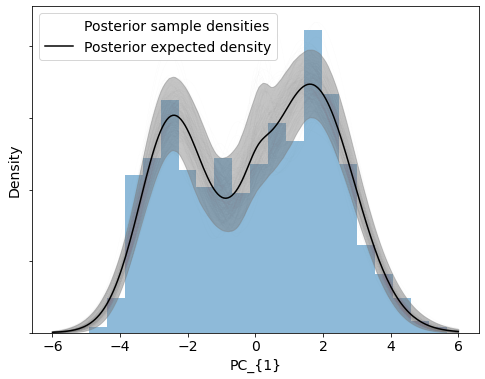

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))

n_bins = 20
ax.hist(x_pca[:,0], bins=n_bins, density=True, lw=0, alpha=0.5)

ax.fill_between(np.linspace(-6, 6, 200), 
                post_pdf_low, post_pdf_high, color="gray", alpha=0.45)
ax.plot(np.linspace(-6, 6, 200), post_pdfs[0], c="gray", label="Posterior sample densities", alpha = 0.001)
ax.plot(np.linspace(-6, 6, 200), post_pdfs[::100].T, c="gray", lw = 0.01)
ax.plot(np.linspace(-6, 6, 200), post_pdfs.mean(axis=0), c="k", label="Posterior expected density")

ax.set_xlabel("PC_{1}")

ax.set_yticklabels([])
ax.set_ylabel("Density")

ax.legend(loc=2);

In [85]:
trace['mu'].mean(axis = 0)[:4]

array([-1.00827026,  1.09469703,  0.65319936, -1.26423631])

In [86]:
trace['tau'].mean(axis = 0)[:4]

array([0.24710651, 0.22319372, 0.62759924, 0.85823034])

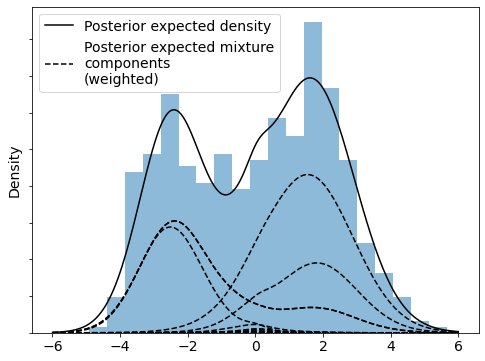

In [89]:
fig, ax = plt.subplots(figsize=(8, 6))

n_bins = 20
ax.hist(x_pca[:,0], bins=n_bins, density=True, lw=0, alpha=0.5)

ax.plot(np.linspace(-6, 6, 200), post_pdfs.mean(axis=0), c="k", label="Posterior expected density")
ax.plot(
    np.linspace(-6, 6, 200),
    (trace["w"][:, np.newaxis, :] * post_pdf_contribs).mean(axis=0)[:, 0],
    "--",
    c="k",
    label="Posterior expected mixture\ncomponents\n(weighted)",
)
ax.plot(np.linspace(-6, 6, 200), (trace["w"][:, np.newaxis, :] * post_pdf_contribs).mean(axis=0), "--", c="k")


ax.set_yticklabels([])
ax.set_ylabel("Density")

ax.legend(loc=2);

In [93]:
trace['w'][-1000:].mean(axis = 0)[:4]

array([0.37844126, 0.56701027, 0.03197377, 0.01713916])

In [92]:
trace['w'][-1000:].std(axis = 0)[:4]

array([0.02955465, 0.03503043, 0.01784565, 0.01239207])